<a href="https://colab.research.google.com/github/enoobis/chess-analysis/blob/main/chess-analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chess Analytics Project
by Daniel Becerra (enoobis)

dataset : https://www.kaggle.com/datasets/datasnaek/chess

In [ ]:
from google.colab import files
upload_data = files.upload()

Saving games_data.csv to games_data.csv


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# chess dataset
data = pd.read_csv('games_data.csv')

#Winning chances for white and black

In [53]:
# the winning chances for white and black
white_wins = data[data["winner"] == "white"].shape[0]
black_wins = data[data["winner"] == "black"].shape[0]
total_games = data.shape[0]

# the winning chances for each color
white_winning_chance = white_wins / total_games
black_winning_chance = black_wins / total_games

# the winning chances for each color
print("White winning chance: {}%".format(white_winning_chance * 100))
print("Black winning chance: {}%".format(black_winning_chance * 100))

White winning chance: 49.86040482600458%
Black winning chance: 45.403330342008175%


#Average number of moves

In [54]:
# the average game duration
average_duration = data["turns"].mean()
print("Average game duration: {:.2f} turns".format(average_duration))

# the number of unique players
unique_players = data["white_id"].nunique() + data["black_id"].nunique()
print("Number of unique players: {}".format(unique_players))

Average game duration: 60.47 turns
Number of unique players: 18769


#Frequently used openings in games

Most common opening moves:
Van't Kruijs Opening                368
Sicilian Defense                    358
Sicilian Defense: Bowdler Attack    296
Scotch Game                         271
French Defense: Knight Variation    271
Name: opening_name, dtype: int64



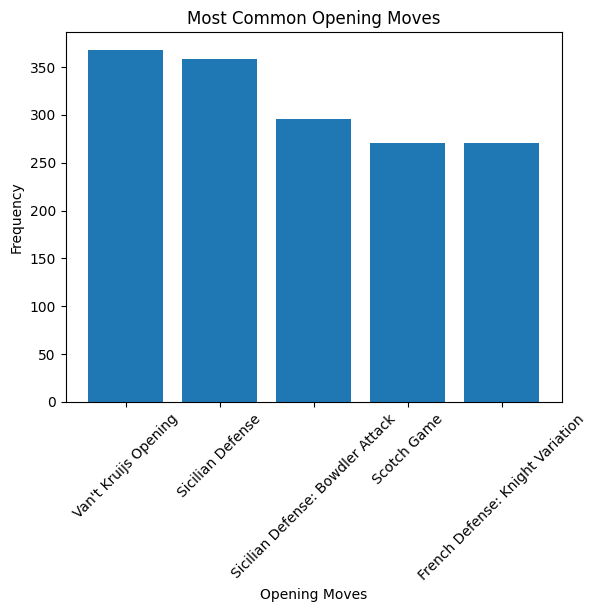

In [71]:
# the most common opening moves
most_common_openings = data["opening_name"].value_counts().head(5)
print("Most common opening moves:")
print(most_common_openings)
print()

# graph 
most_common_openings = data["opening_name"].value_counts().head(5)

plt.bar(most_common_openings.index, most_common_openings.values)
plt.xlabel("Opening Moves")
plt.ylabel("Frequency")
plt.title("Most Common Opening Moves")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#Draw

In [56]:
# the percentage of games that ended in a draw
draws = data[data["winner"] == "draw"].shape[0]
draw_percentage = draws / total_games * 100
print("Percentage of games that ended in a draw: {:.2f}%".format(draw_percentage))

Percentage of games that ended in a draw: 4.74%


#Rated players : behind , above : your rating

In [58]:
# the average rating difference between players
rating_diff = data["white_rating"] - data["black_rating"]
average_rating_diff = rating_diff.mean()
print("Average rating difference between players: {:.2f}".format(average_rating_diff))


Average rating difference between players: 7.80


#The most common game termination reasons

Most common game termination reasons:
resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64



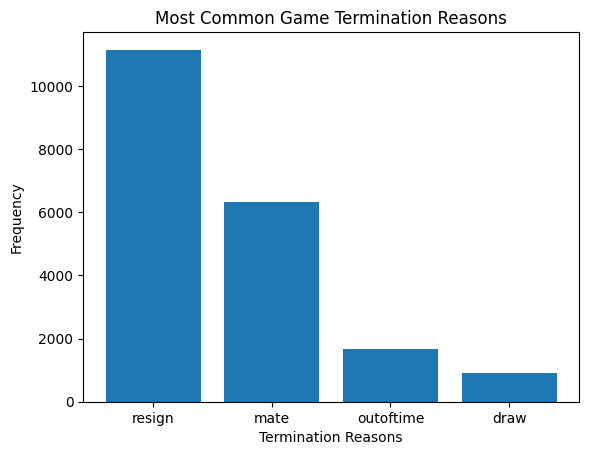

In [69]:
# the most common game termination reasons
termination_reasons = data["victory_status"].value_counts()
print("Most common game termination reasons:")
print(termination_reasons)
print()

# graph
termination_reasons = data["victory_status"].value_counts()

plt.bar(termination_reasons.index, termination_reasons.values)
plt.xlabel("Termination Reasons")
plt.ylabel("Frequency")
plt.title("Most Common Game Termination Reasons")
plt.show()

#H player % of wins

In [60]:
# the percentage of games won by the player with higher rating
higher_rating_wins = data[(data["winner"] == "white") & (data["white_rating"] > data["black_rating"])].shape[0]
higher_rating_wins += data[(data["winner"] == "black") & (data["black_rating"] > data["white_rating"])].shape[0]
higher_rating_win_percentage = higher_rating_wins / total_games * 100
print("Percentage of games won by the player with higher rating: {:.2f}%".format(higher_rating_win_percentage))

Percentage of games won by the player with higher rating: 61.58%


#Average rating for white and black

In [61]:
# the average rating for white players
average_white_rating = data[data["winner"] == "white"]["white_rating"].mean()
print("Average rating for white players: {:.2f}".format(average_white_rating))

# the average rating for black players
average_black_rating = data[data["winner"] == "black"]["black_rating"].mean()
print("Average rating for black players: {:.2f}".format(average_black_rating))

Average rating for white players: 1634.18
Average rating for black players: 1638.23


#White vs Black : white = blue ; black = red

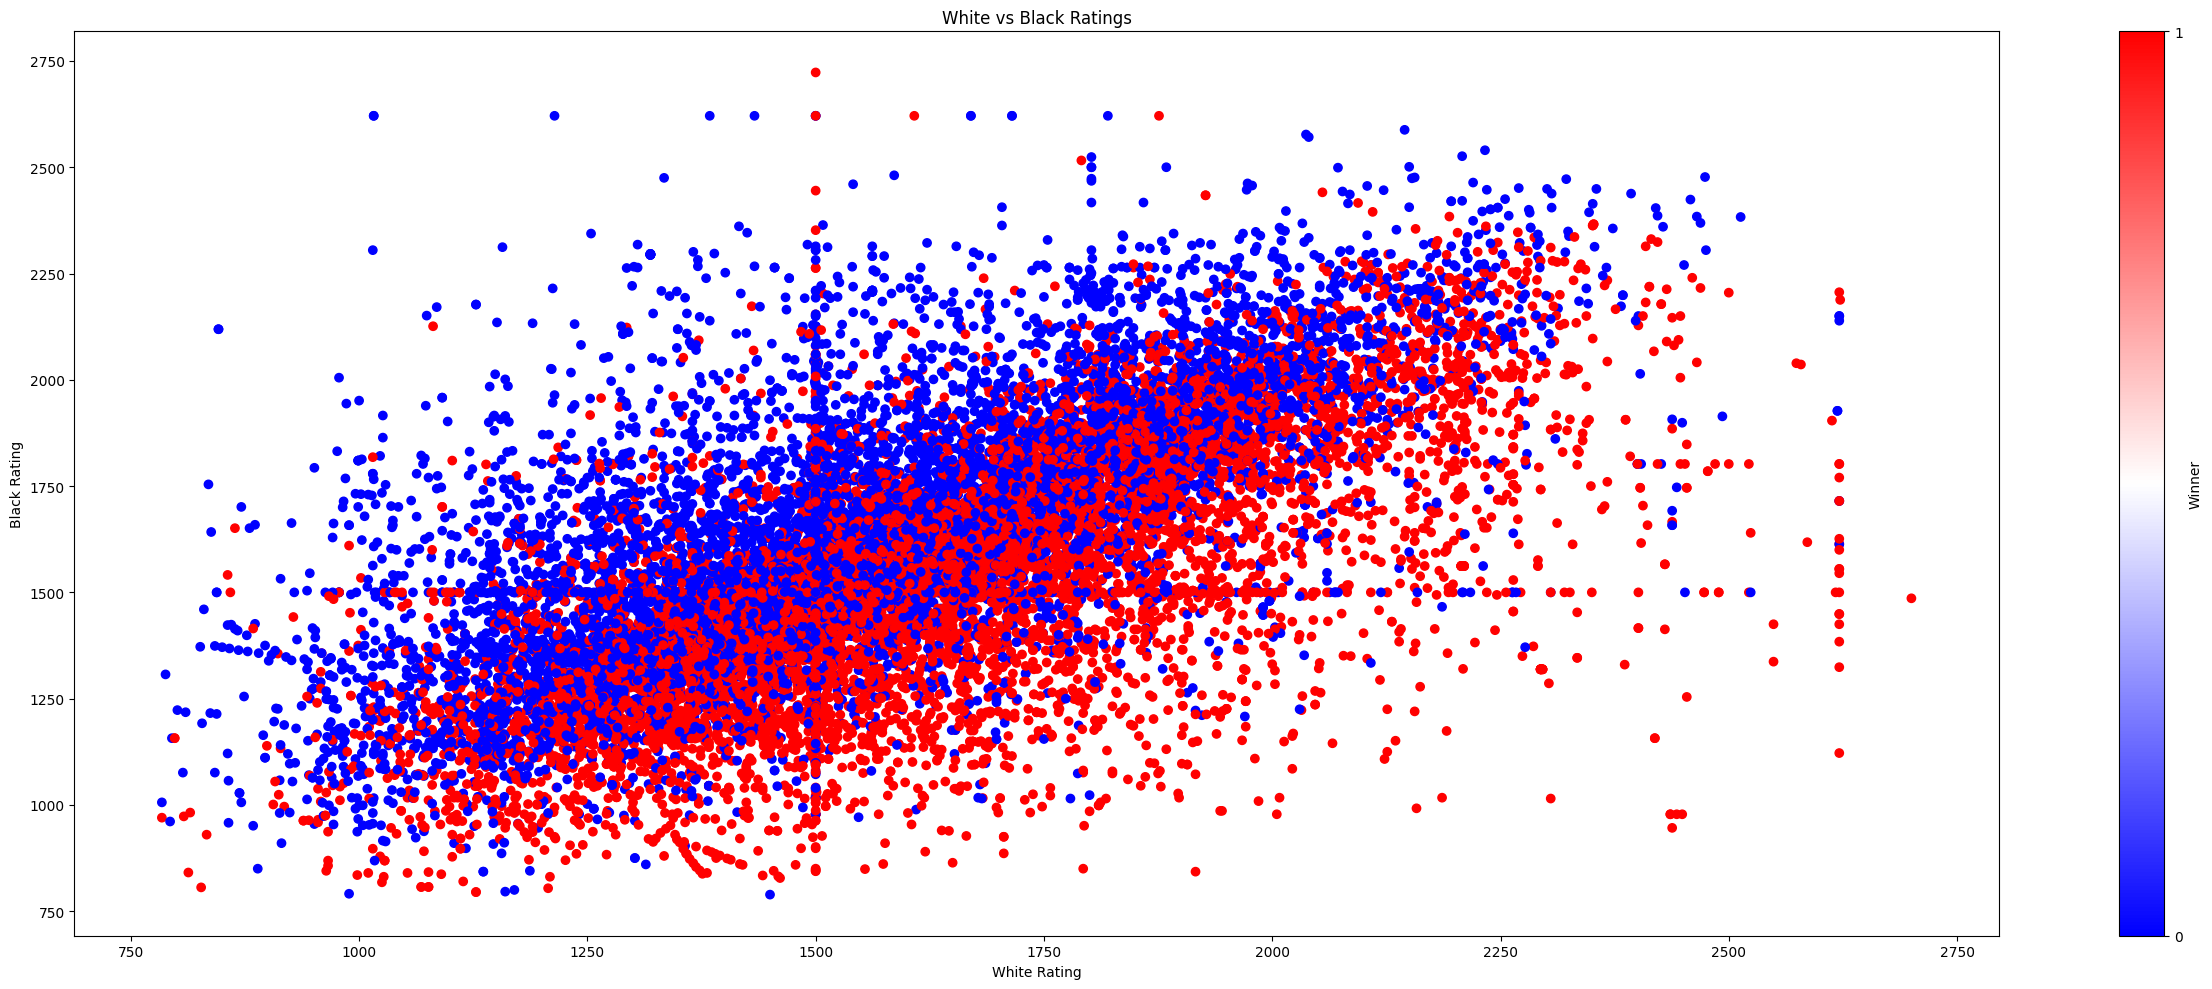

In [82]:
white_wins = data['winner'] == 'white'

plt.figure(figsize=(25, 10))  
plt.scatter(data['white_rating'], data['black_rating'], c=white_wins, cmap='bwr')
plt.xlabel('White Rating')
plt.ylabel('Black Rating')
plt.title('White vs Black Ratings')
plt.colorbar(ticks=[0, 1], label='Winner') 
plt.tight_layout()  
plt.show()


# All Openings 

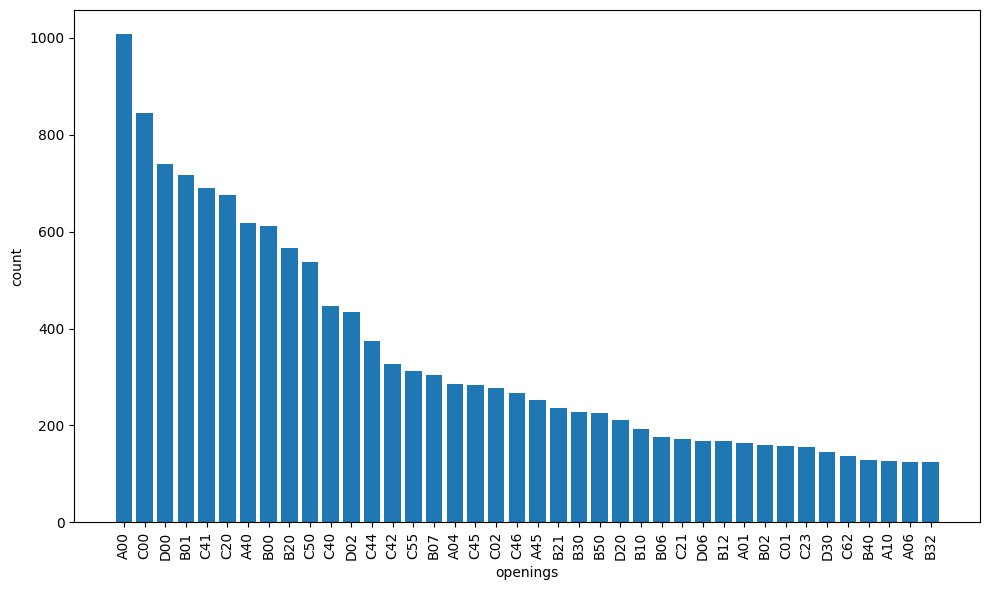

In [83]:

most_popular_openings = np.array(data['opening_eco'].value_counts()[:40].keys())
most_popular_openings_counts = np.array(data['opening_eco'].value_counts()[:40])

plt.figure(figsize=(10, 6))  
plt.bar(most_popular_openings, most_popular_openings_counts)
plt.xlabel('openings')
plt.ylabel('count')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()